In [1]:
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import altair as alt
from altair import *
alt.renderers.enable('notebook')
from vega_datasets import data

In [2]:
may_trip_scooters = pd.read_csv('./data/may_trip.csv')
may_trip_scooters.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [3]:
may_trip_scooters.shape

(224969, 16)

In [4]:
may_trip_scooters.tripRecordNum.value_counts()

LIM870     31
LIM1331    31
LIM1027    31
LIM1373    31
LIM647     31
           ..
BRD8938     1
JMP370      1
BRD7450     1
LIM6900     1
LIM5789     1
Name: tripRecordNum, Length: 23226, dtype: int64

In [5]:
#Total number of trips/readings entry per company
may_trip_scooters.companyName.value_counts()

Lime             102569
Lyft              54271
Bird              53496
SPIN               8471
Bolt Mobility      4912
Gotcha              650
JUMP                600
Name: companyName, dtype: int64

In [6]:
#Count of trip record number sorted by scooter ID number.
may_trips_groups = may_trip_scooters.groupby('tripRecordNum')['sumdID'].nunique()
may_trips_groups

tripRecordNum
BOL00001    8
BOL00002    8
BOL00003    8
BOL00004    6
BOL00005    7
           ..
SPI995      2
SPI996      3
SPI997      2
SPI998      2
SPI999      3
Name: sumdID, Length: 23226, dtype: int64

In [7]:
#Total Count of scooters that belong to each company sorted by ID number.
may_trips_groups = may_trip_scooters.groupby('companyName')['sumdID'].nunique()
may_trips_groups

companyName
Bird             2945
Bolt Mobility     342
Gotcha            105
JUMP                1
Lime             1576
Lyft             1361
SPIN              636
Name: sumdID, dtype: int64

In [8]:
may_DT = may_trip_scooters.pubTimeStamp.str.split(" ", expand=True)
may_DT.head()

,0,1
0,2019-05-01,00:00:55.423000
1,2019-05-01,00:03:33.147000
2,2019-05-01,00:05:55.570000
3,2019-05-01,00:05:55.570000
4,2019-05-01,00:05:55.570000


In [9]:
may_specified = may_DT.join(may_trip_scooters, how='outer')
may_specified.head()

,0,1,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01,00:00:55.423000,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01,00:03:33.147000,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01,00:05:55.570000,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01,00:05:55.570000,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01,00:05:55.570000,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [10]:
may_scooters_cols = may_specified.drop(columns=['pubTimeStamp'])
may_scooters_cols.head(2)

,0,1,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01,00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01,00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000


In [11]:
new_may_trips = may_scooters_cols.rename(columns = {0:'date',1: 'time','companyName':'company','tripRecordNum':'tripNum','startLatitude':'startLat','startLongitude':'startLong','endLatuitude':'endLat','endLongitude':'endLong'})
new_may_trips.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
0,2019-05-01,00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01,00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000


In [12]:
#trip distance of 1/4 mile which is 1320 feet. 
travel_distance = new_may_trips.query('tripDistance >=1320') 
travel_distance.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
1,2019-05-01,00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01,00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000


In [13]:
#time duration of greater than 5 minutes
scooter_trips = travel_distance.query('5<=tripDuration<=120') 
scooter_trips.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
8,2019-05-01,00:10:56.013000,Bird,BRD2193,PoweredSX2AW,6.0,2624.672,2019-05-01 00:00:00,00:06:34.436666,2019-05-01 00:00:00,00:12:48.676666,36.1708,-86.7893,36.1746,-86.7860,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833000
9,2019-05-01,00:10:56.013000,Bird,BRD2194,PoweredL968V,6.0,2624.672,2019-05-01 00:00:00,00:05:36.870000,2019-05-01 00:00:00,00:11:19.183333,36.1565,-86.7971,36.1512,-86.7968,"[[36.15654,-86.797137],[36.153065,-86.798047],...",2019-05-02 05:30:24.920000


In [14]:
scooter_trips.sumdID.value_counts()

Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2    366
PoweredK7KQZYLIVXP3A                           129
PoweredPDGQQ2VKBRR6N                           126
Powered75MFAMZCCD3QJ                           123
PoweredWVIAXNCVDNOXP                           120
                                              ... 
Powered1RAT3                                     1
Powered375                                       1
Powered2UM6OD6W4KRY7                             1
PoweredDBUMF                                     1
PoweredAMLAI4DWT2SXM                             1
Name: sumdID, Length: 6343, dtype: int64

In [15]:
scooter_trips.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
8,2019-05-01,00:10:56.013000,Bird,BRD2193,PoweredSX2AW,6.0,2624.672,2019-05-01 00:00:00,00:06:34.436666,2019-05-01 00:00:00,00:12:48.676666,36.1708,-86.7893,36.1746,-86.7860,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833000
9,2019-05-01,00:10:56.013000,Bird,BRD2194,PoweredL968V,6.0,2624.672,2019-05-01 00:00:00,00:05:36.870000,2019-05-01 00:00:00,00:11:19.183333,36.1565,-86.7971,36.1512,-86.7968,"[[36.15654,-86.797137],[36.153065,-86.798047],...",2019-05-02 05:30:24.920000


In [16]:
unique_days = scooter_trips.query('startDate<"2019-05-07" & startDate >= "2019-05-03" & endDate <"2019-05-07"') 
unique_days.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
8757,2019-05-03,00:07:20.837000,Lyft,LFT17,Powered278313,6.166633,3218.50404,2019-05-03 00:00:00,00:01:10.733333,2019-05-03 00:00:00,00:07:20.730000,36.16458,-86.77691,36.15707,-86.77446,"[[36.16458,-86.77691],[36.16457,-86.777],[36.1...",2019-05-04 07:29:10.067000
8761,2019-05-03,00:08:05.667000,Bird,BRD2952,PoweredHHISN,5.000000,1640.42000,2019-05-03 00:00:00,00:04:27.270000,2019-05-03 00:00:00,00:09:45.263333,36.15080,-86.78210,36.15400,-86.78480,"[[36.150855,-86.782041],[36.151102,-86.782375]...",2019-05-04 05:30:20.290000


In [17]:
center = center = [36.161278209287914, -86.77756457127047]
map_downtown = folium.Map(location =  center, zoom_start = 15)
map_downtown
for row in unique_days.head(10).iterrows():
    row_values = row[1] 
    location = [row_values['startLat'], row_values['startLong']]
    popup = (str(row_values['sumdID']) + ': ' + 
             str(row_values['date']) + '<br/>' +
             str(row_values['time'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    
    marker.add_to(map_downtown)


map_downtown

In [18]:
nashville = gpd.read_file('./data/MDHA_Promise_Zones/Export_Output_5.shp')
nashville.geometry = nashville.geometry.to_crs(epsg=4326)

In [19]:
folium.GeoJson(nashville).add_to(map_downtown)
map_downtown

In [20]:
random_days = unique_days.sample(10)
random_days.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
36252,2019-05-06,03:05:59.577000,Lyft,LFT608,Powered486289,8.550967,3323.49092,2019-05-06 00:00:00,02:57:26.423333,2019-05-06 00:00:00,03:05:59.480000,36.14545,-86.79273,36.15254,-86.79088,"[[36.14545,-86.79273],[36.14549,-86.79271],[36...",2019-05-07 08:19:04.930000
15730,2019-05-03,23:10:50.863000,Lyft,LFT2164,Powered662106,5.953967,2585.30192,2019-05-03 00:00:00,23:04:53.513333,2019-05-03 00:00:00,23:10:50.750000,36.15024,-86.81312,36.14822,-86.81042,"[[36.15024,-86.81312],[36.15026,-86.81292],[36...",2019-05-04 07:30:27.270000


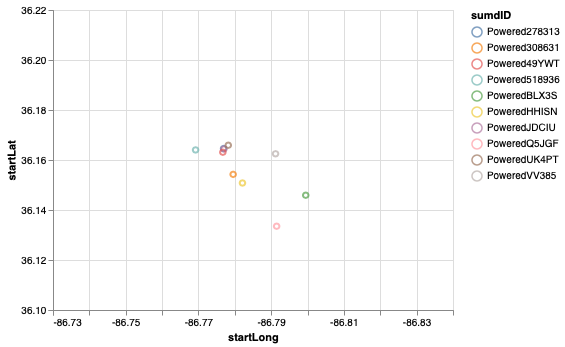

In [21]:
alt.Chart(unique_days.head(10)).mark_point().encode(
    X('startLong:Q',scale=Scale(domain=(-86.73, -86.84))),
    Y('startLat:Q', scale=Scale(domain=(36.1, 36.22))),
    color='sumdID:N')
    

In [22]:
center = folium.Map([36.161278209287914, -86.77756457127047], zoom_start=11)
for _, row in random_days.iterrows():
   trip = str(row['tripNum'])
   scooter_id = str(row['sumdID'])
   start_loc = [row['startLat'], row['startLong']]
   start_time = str(row['startTime'])
   start_marker = folium.Marker(location = start_loc,
                 popup = scooter_id + ': ' + trip + '<br/>' + start_time,
                 icon=folium.Icon(color='green'))
   start_marker.add_to(center)
   folium.Marker([row['endLatitude'], row['endLong']],
                 icon=folium.Icon(color='red')).add_to(center)
   folium.PolyLine([[row['startLat'], row['startLong']],
                    [row['endLatitude'], row['endLong']]], color="purple").add_to(center)
folium.GeoJson(nashville).add_to(center)
center

In [23]:
may_fifth = unique_days.query('startDate<"2019-05-06" & startDate >= "2019-05-05" & endDate <"2019-05-06"')
may_fifth.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
26679,2019-05-05,00:15:37.010000,Bird,BRD5647,PoweredX76D2,8.000,1640.4200,2019-05-05 00:00:00,00:08:34.156666,2019-05-05 00:00:00,00:16:54.646666,36.15090,-86.78190,36.15170,-86.77970,"[[36.154863,-86.777018],[36.154934,-86.776911]...",2019-05-06 05:30:23.590000
26688,2019-05-05,00:18:21.677000,Lyft,LFT34,Powered553364,10.719,7283.4648,2019-05-05 00:00:00,00:07:38.446666,2019-05-05 00:00:00,00:18:21.586666,36.15689,-86.77475,36.16956,-86.75897,"[[36.15689,-86.77475],[36.15684,-86.77475],[36...",2019-05-06 07:27:29.787000


In [24]:
cinco_de_mayo = may_fifth.query('startTime >= "20:00:00" & endTime <="22:00:00"') 
cinco_de_mayo.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
31091,2019-05-05,20:06:32.723000,Bird,BRD2426,PoweredL18FE,7.0,1968.504,2019-05-05 00:00:00,20:00:36.286666,2019-05-05 00:00:00,20:07:21.823333,36.1755,-86.7881,36.1795,-86.7899,"[[36.17566,-86.788176],[36.175916,-86.788377],...",2019-05-06 05:31:31.993000
31093,2019-05-05,20:06:32.723000,Bird,BRD2424,PoweredZDM7Y,7.0,4921.260,2019-05-05 00:00:00,20:01:04.276666,2019-05-05 00:00:00,20:08:03.833333,36.1510,-86.7831,36.1455,-86.7821,"[[36.151024,-86.783175],[36.150835,-86.782807]...",2019-05-06 05:31:31.933000


In [25]:
def build_LineString(string):
    coord_list = json.loads(string)
    if len(coord_list) <=1:
        return np.NaN
    else:
        try:
            return LineString([Point(float(lng), float(lat)) for lat, lng in coord_list])
        except:
            print(string)
            raise

In [26]:
cinco_de_mayo['geometry'] = cinco_de_mayo.tripRoute.apply(build_LineString)

/Users/teresiamaina/.local/share/virtualenvs/projects-MgIGDI7W/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
cinco_de_mayo=cinco_de_mayo.loc[cinco_de_mayo.geometry.notna()]

In [28]:
cinco_geo=gpd.GeoDataFrame(cinco_de_mayo,crs=nashville.crs, geometry=cinco_de_mayo.geometry)

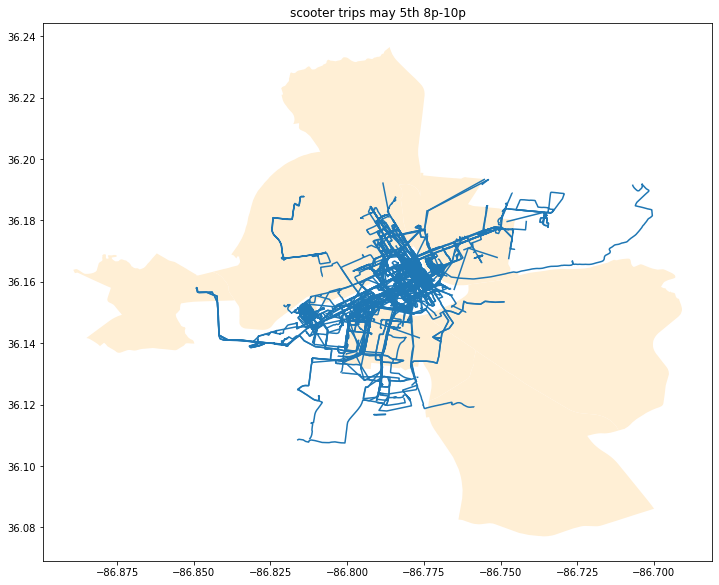

In [29]:
ax = nashville.plot(figsize = (12, 12), color = 'papayawhip')
cinco_geo.plot(ax=ax)
plt.title('scooter trips may 5th 8p-10p')
plt.savefig("may 5th 8pm")
plt.show();

In [30]:
mothers_day = scooter_trips.query('startDate<"2019-05-13" & startDate >= "2019-05-12" & endDate <"2019-05-13"')
mothers_day.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
71065,2019-05-12,00:07:50.643000,Lyft,LFT16,Powered849206,6.591383,2004.59324,2019-05-12 00:00:00,00:01:15.003333,2019-05-12 00:00:00,00:07:50.486666,36.15884,-86.77448,36.15946,-86.77439,"[[36.15884,-86.77448],[36.15883,-86.77442],[36...",2019-05-13 10:57:17.813000
71066,2019-05-12,00:08:16.503000,Lyft,LFT17,Powered158534,6.036917,2109.58012,2019-05-12 00:00:00,00:02:14.196666,2019-05-12 00:00:00,00:08:16.410000,36.17824,-86.78696,36.17350,-86.78546,"[[36.17824,-86.78696],[36.17784,-86.78669],[36...",2019-05-13 10:57:17.853000


In [31]:
mothers_day_t = mothers_day.query('startTime >= "20:00:00" & endTime <="22:00:00"') 
mothers_day_t.head(2)

,date,time,company,tripNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLat,startLong,endLatitude,endLong,tripRoute,create_dt
76053,2019-05-12,20:04:41.420000,Bird,BRD1879,PoweredR8DM1,6.0,1968.504,2019-05-12 00:00:00,20:00:32.996666,2019-05-12 00:00:00,20:06:35.686666,36.160,-86.7788,36.1601,-86.7837,"[[36.160525,-86.778814],[36.15905,-86.782002],...",2019-05-13 05:31:25.253000
76084,2019-05-12,20:09:41.667000,Bird,BRD1901,Powered5ZVXC,8.0,2624.672,2019-05-12 00:00:00,20:01:35.690000,2019-05-12 00:00:00,20:09:55.346666,36.166,-86.7780,36.1616,-86.7758,"[[36.166154,-86.777889],[36.165824,-86.778102]...",2019-05-13 05:31:25.583000


In [32]:
mothers_day_t['geometry'] = mothers_day_t.tripRoute.apply(build_LineString)
mothers_day_t=mothers_day_t.loc[mothers_day_t.geometry.notna()]
mothers_day_t_geo=gpd.GeoDataFrame(mothers_day_t,crs=nashville.crs, geometry=mothers_day_t.geometry)

/Users/teresiamaina/.local/share/virtualenvs/projects-MgIGDI7W/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


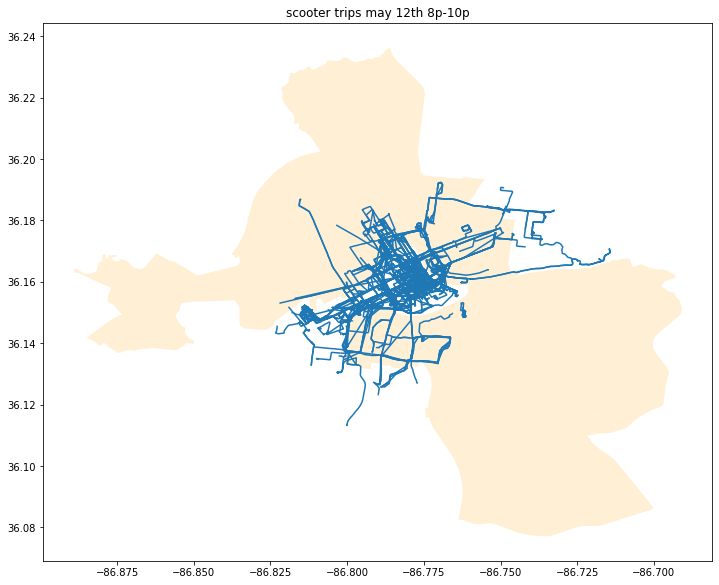

In [33]:
ax = nashville.plot(figsize = (12, 12), color = 'papayawhip')
mothers_day_t_geo.plot(ax=ax)
plt.title('scooter trips may 12th 8p-10p')
plt.savefig("may 12th 8pm")
plt.show();